In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
#library that contains punctuation
import string
from wordcloud import WordCloud
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
print("SpaCy version: {}".format(spacy.__version__))
print("nltk version: {}".format(nltk.__version__))
import time
from nltk import ngrams

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
SpaCy version: 2.2.4
nltk version: 3.2.5


In [ ]:
train = pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,Score,Review_text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Score        426340 non-null  int64 
 1   Review_text  426340 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [ ]:
train.describe()

,Score
count,426340.000000
mean,4.180928
std,1.312447
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
train.loc[0]

Score                                                          5
Review_text    I received this product early from the seller!...
Name: 0, dtype: object

In [ ]:
train.loc[0,'Review_text']

'I received this product early from the seller! They are a very tastey & a Great mid-day snack. I have shared them with my Glutten Free Friends & they will be ordering this product & more very soon. Very Good'

In [ ]:
train.loc[1]

Score                                                          5
Review_text    *****<br />Numi's Collection Assortment Melang...
Name: 1, dtype: object

In [ ]:
train.loc[1,'Review_text']

'*****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer writes: "From mist-covered mountains to sun-drenched deserts

# Visualisation

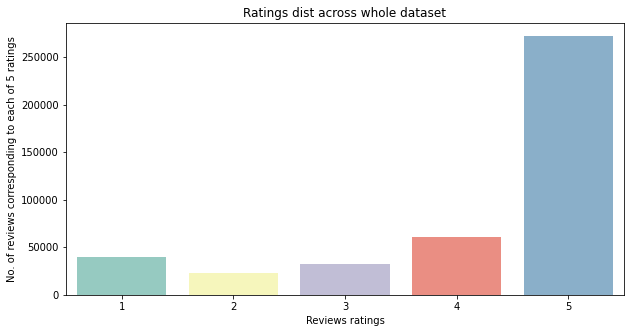

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Score',data=train,palette='Set3')
#sns.countplot()
plt.title('Ratings dist across whole dataset')
plt.xlabel('Reviews ratings')
plt.ylabel("No. of reviews corresponding to each of 5 ratings")
plt.show()

In [ ]:
def generate_word_cloud(Text):
    wordcloud = WordCloud(
        background_color='white',
        width = 3000,
        height = 2000).generate(str(Text))
    fig = plt.figure(
        figsize = (20, 12),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
# https://www.kaggle.com/sonalisingh1411/nlp-part-1-amazon-fine-food-sentiment-analysis

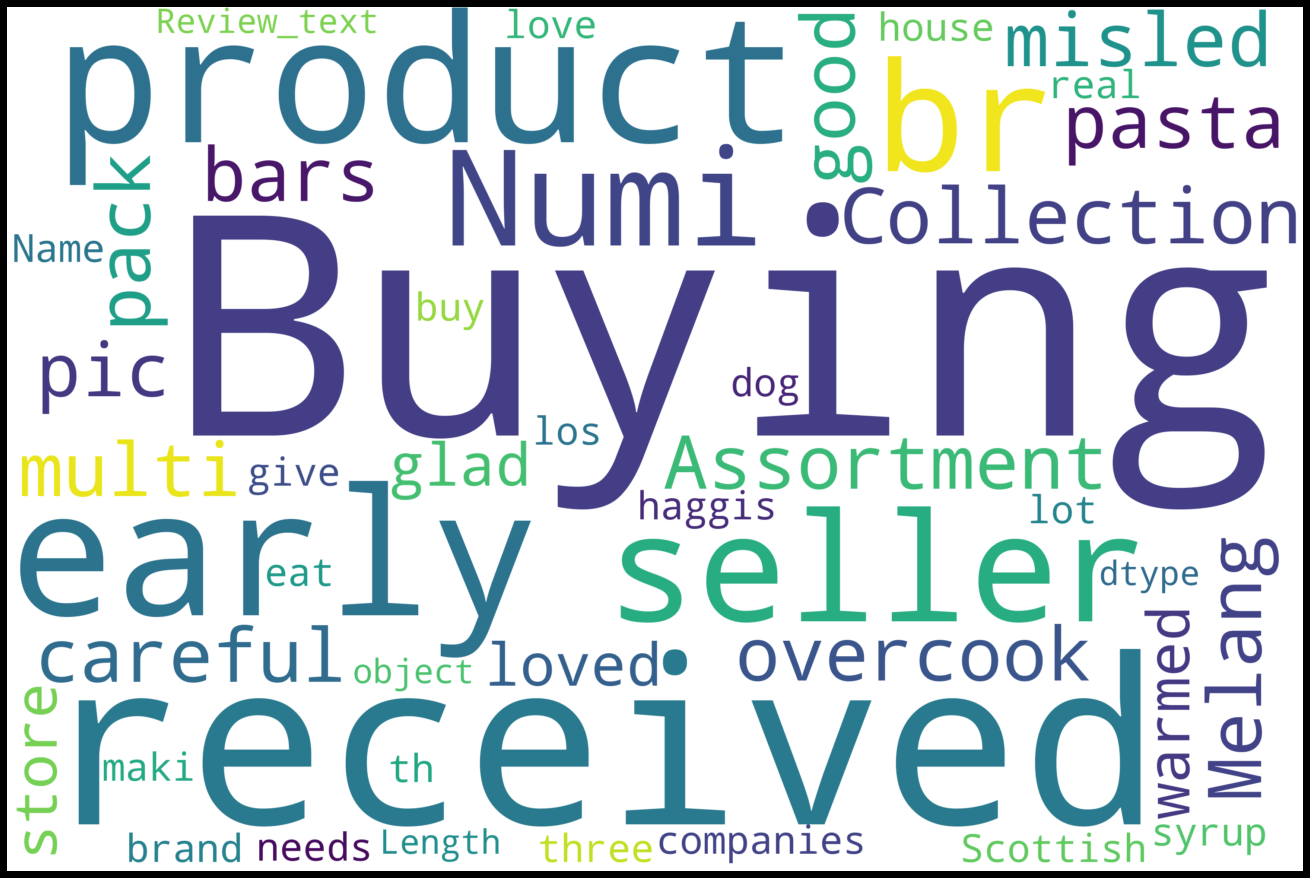

In [ ]:
texts = train['Review_text']
generate_word_cloud(texts)

# Data Cleaning

In [ ]:
train.duplicated().value_counts()

False    308934
True     117406
dtype: int64

In [ ]:
train_unique = train.drop_duplicates(keep ='first')
train_unique.duplicated().value_counts()

False    308934
dtype: int64

In [ ]:
def data_cleanup(sentence):
    
    # writing to lower case
    sentence = sentence.lower()
    
    # open contractions
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", "", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    
    # remove HTML tags
    sentence = re.sub(r"<.*?>",' ',sentence)
    
    # remove punctuations
    sentence = re.sub(r"[^a-zA-Z]",' ',sentence)
    
    # remove words with numbers
    sentence = re.sub(r"\S*\d\S*",' ',sentence).strip()
    
    # remove URLs
    sentence = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", sentence)
    
    
    
    return sentence

In [ ]:
train_unique['clean_reviews'] = train_unique['Review_text'].apply(data_cleanup)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#defining the function to remove punctuation
# def remove_punctuation(text):
#     punctuationfree="".join([i for i in text if i not in string.punctuation])
#     return punctuationfree
# #storing the puntuation free text
# data['clean_msg']= data['v2'].apply(lambda x:remove_punctuation(x))
# data.head()

In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews
0,5,I received this product early from the seller!...,i received this product early from the seller ...
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...


# Tokenisation

In [ ]:
# spacy
from spacy.lang.en import English
vocab = English()

# Create a Tokenizer with the default settings for English
# does NOT need modifications since the text is written using natural English
tokenizer = vocab.tokenizer
# nlp = spacy.load("en_core_web_sm", exclude=["parser", "ner", "attrbute_ruler"])

start_time = time.time()
# apply tokenizer
train_unique['spacy_tokens'] = train_unique['clean_reviews'].apply(tokenizer)

print("Time taken to run Spacy tokenisation (converting to spacy tokens) is ", time.time() - start_time, " ms")


Time taken to run Spacy tokenisation (converting to spacy tokens) is  48.038718938827515  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,spacy_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"(i, received, this, product, early, from, the,..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi s collection assortment melange includes ...,"(numi, s, collection, assortment, melange, inc..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"(i, was, very, careful, not, to, overcook, thi..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"(buying, this, multi, pack, i, was, misled, by..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"(these, bars, are, so, good, , i, loved, them..."


In [ ]:
# nltk
import nltk
nltk.download('punkt')

start_time = time.time()

# apply tokenizer
train_unique['nltk_tokens'] = train_unique['clean_reviews'].apply(nltk.word_tokenize)

print("Time taken to run NLTK tokenisation is ", time.time() - start_time, " ms")

train_unique.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Time taken to run NLTK tokenisation is  78.10921478271484  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Score,Review_text,clean_reviews,tokens,nltk_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...","[i, received, this, product, early, from, the,..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[2268, 2593, 1761, 13341, 2202, 1274, 406, 550...","[numi, collection, assortment, melange, includ..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[2, 20, 34, 1087, 10, 6, 6291, 9, 370, 338, 20...","[i, was, very, careful, not, to, overcook, thi..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[226, 9, 2427, 191, 2, 20, 10547, 91, 1, 914, ...","[buying, this, multi, pack, i, was, misled, by..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...","[these, bars, are, so, good, i, loved, them, w..."


In [ ]:
print("Original Text")
print(train_unique.loc[4,'clean_reviews'])
print("Spacy Tokens")
print(train_unique.loc[4,'spacy_tokens'])
print("NLTK Tokens")
print(train_unique.loc[4,'nltk_tokens'])

Original Text
these bars are so good  i loved them warmed up  i definitely think these are a great snack or breakfast  i received this product for free from influenster  yum
Spacy Tokens
these bars are so good  i loved them warmed up  i definitely think these are a great snack or breakfast  i received this product for free from influenster  yum
NLTK Tokens
['these', 'bars', 'are', 'so', 'good', 'i', 'loved', 'them', 'warmed', 'up', 'i', 'definitely', 'think', 'these', 'are', 'a', 'great', 'snack', 'or', 'breakfast', 'i', 'received', 'this', 'product', 'for', 'free', 'from', 'influenster', 'yum']


Spacy tokenizes the extra spaces while NLTK skips them - > NLTK > Spacy

# Stop word removals

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
nltk_stopwords = set(stopwords.words('english'))
common_stopwords = [word for word in spacy_stopwords if word in nltk_stopwords]
print("There are", len(common_stopwords), " common stopwords")
print(common_stopwords)
print()
print("The unique stop words in Spacy are:")
print([word for word in spacy_stopwords if word not in nltk_stopwords])
print("The unique stop words in NLTK are:")
print([word for word in nltk_stopwords if word not in spacy_stopwords])

In [ ]:
# spacy
def remove_stopwords(tokens):
    return [token for token in tokens if not token.is_stop]
    
start_time = time.time()

train_unique['spacy_tokens'] = train_unique['spacy_tokens'].apply(remove_stopwords)

print("Time taken to remove stop words in Spacy is ", time.time() - start_time, " ms")


In [ ]:
# nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

start_time = time.time()
train_unique['nltk_tokens'] = train_unique['nltk_tokens'].apply(remove_stopwords)
print("Time taken to remove stop words in NLTK is ", time.time() - start_time, " ms")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Time taken to remove stop words in NLTK is  4.163117170333862  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,tokens,nltk_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...","[received, product, early, seller, tastey, gre..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[2268, 2593, 1761, 13341, 2202, 1274, 406, 550...","[numi, collection, assortment, melange, includ..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[2, 20, 34, 1087, 10, 6, 6291, 9, 370, 338, 20...","[careful, overcook, pasta, making, sure, take,..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[226, 9, 2427, 191, 2, 20, 10547, 91, 1, 914, ...","[buying, multi, pack, misled, picture, whole, ..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...","[bars, good, loved, warmed, definitely, think,..."


Spacy has more robust stopwords, but these can take away meaning. NLTK > Spacy

# Lemmatisation

In [ ]:
# spacy
def lemmatize(tokens):
    return [token.lemma_ for token in tokens]

# DOES NOT WORK BECAUSE IT HAS TO BE INITIALISED WITH THE NLP PIPELINE
# AND THE NLP PIPELINE LEADS AN OVERLOAD OF MEMORY
start_time = time.time()
train_unique['spacy_tokens'] = train_unique['spacy_tokens'].apply(lemmatize)
print("Time taken to run Spacy Lemmatisation is ", time.time() - start_time, " ms")


Time taken to run Spacy Lemmatisation is  24.367894887924194  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# nltk
#  Lemmatize using WordNet's built-in morphy function.
#  Returns the input word unchanged if it cannot be found in WordNet.
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

start_time = time.time()
train_unique['nltk_tokens'] = train_unique['nltk_tokens'].apply(lemmatize)
print("Time taken to run NLTK Lemmatisation is ", time.time() - start_time, " ms")

Time taken to run NLTK Lemmatisation is  45.2444953918457  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,tokens,nltk_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...","[received, product, early, seller, tastey, gre..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[2268, 2593, 1761, 13341, 2202, 1274, 406, 550...","[numi, collection, assortment, melange, includ..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[2, 20, 34, 1087, 10, 6, 6291, 9, 370, 338, 20...","[careful, overcook, pasta, making, sure, take,..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[226, 9, 2427, 191, 2, 20, 10547, 91, 1, 914, ...","[buying, multi, pack, misled, picture, whole, ..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...","[bar, good, loved, warmed, definitely, think, ..."


# Stemming
Spacy does not offer stemmming

In [ ]:
#stemming
from nltk.stem import PorterStemmer # can be used
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')
porter_stemmer = PorterStemmer()

def snowball_stem(tokens):
    return [snowball_stemmer.stem(token) for token in tokens]

def porter_stem(tokens):
    return [porter_stemmer.stem(token) for token in tokens]

start_time = time.time()
train_unique['snowball_tokens'] = train_unique['nltk_tokens'].apply(snowball_stem)
print("Time taken to run Snowball Stemming is ", time.time() - start_time, " ms")
start_time = time.time()
train_unique['porter_tokens'] = train_unique['nltk_tokens'].apply(porter_stem)
print("Time taken to run Porter Stemming is ", time.time() - start_time, " ms")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Time taken to run Snowball Stemming is  186.0142650604248  ms
Time taken to run Porter Stemming is  295.29492378234863  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,spacy_tokens,nltk_tokens,snowball_tokens,porter_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[received, product, early, seller, , tastey, ...","[received, product, early, seller, tastey, gre...","[receiv, product, earli, seller, tastey, great...","[receiv, product, earli, seller, tastey, great..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi s collection assortment melange includes ...,"[numi, s, collection, assortment, melange, inc...","[numi, collection, assortment, melange, includ...","[numi, collect, assort, melang, includ, herbal...","[numi, collect, assort, melang, includ, herbal..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[careful, overcook, pasta, , making, sure, bi...","[careful, overcook, pasta, making, sure, take,...","[care, overcook, pasta, make, sure, take, bite...","[care, overcook, pasta, make, sure, take, bite..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[buying, multi, pack, misled, picture, hazel, ...","[buying, multi, pack, misled, picture, whole, ...","[buy, multi, pack, misl, pictur, whole, hazel,...","[buy, multi, pack, misl, pictur, whole, hazel,..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[bars, good, , loved, warmed, , definitely, ...","[bar, good, loved, warmed, definitely, think, ...","[bar, good, love, warm, definit, think, great,...","[bar, good, love, warm, definit, think, great,..."


# Representation

In [ ]:
# Exclude components not required when loading the spaCy model.
# nlp = spacy.load("en_core_web_sm", exclude=["tok2vec", "parser", "ner", "attrbute_ruler"])
# for t in train_unique['spacy_tokens'][0]:
#     print(t.lemma_)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train['Review_text'])

In [ ]:
model = LogisticRegression()
model.fit(X_train, train.Score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
X_test = tfidf.transform(test['Review_text'])

In [ ]:
y = model.predict(X_test) # Accuracy for baseline classifier LR is 77% on test set

In [ ]:
# !touch ./SampleSubmission.csv

In [ ]:
# sample=pd.read_csv('SampleSubmission.csv') # Compare to majority class
# sample.head()
# sample.describe()

In [ ]:
# print("Test set score:{:.2f}".format(np.mean(y==sample.Score)))


In [ ]:
# sample['Score'] = y # save the labels for your model to csv file
# sample.to_csv('mySubmission.csv', index=False)

**N-Grams**

In [ ]:
# allGrams = []
# def generate_ngrams(n=1):
#     # for sentence in train_unique['clean_reviews'][:4]: # added the top 4 clean_reviews for test putposes; Todo: remove [:4]
#     first4_df = train_unique['clean_reviews'].head()
#     for sentence in first4_df:
#         n_grams = ngrams(sentence.split(), n)
#         # print(n_grams)
#         for grams in n_grams:
#             print(grams)
#             # allGrams.append(grams)
#             bigram_series = (pd.Series(grams).value_counts())[:10]
#             bigram_series.plot.barh(color='blue', figsize=(12, 8))
#             # plt.title('Most Frequently Occuring Bigrams')
#             plt.ylabel(f'{i}gram')
#             plt.xlabel('# of Occurances')
#             plt.savefig(f"{i}gram.jpg")

In [ ]:
def get_ngrams( n):
    first4_df = train_unique['clean_reviews']
    for sentence in first4_df:
        n_grams = ngrams(sentence.split(), n)
    return [' '.join(grams) for grams in n_grams]

In [ ]:
get_ngrams(5)

['we eat a lot of',
 'eat a lot of syrup',
 'a lot of syrup in',
 'lot of syrup in our',
 'of syrup in our house',
 'syrup in our house my',
 'in our house my three',
 'our house my three year',
 'house my three year olds',
 'my three year olds favorite',
 'three year olds favorite foods',
 'year olds favorite foods are',
 'olds favorite foods are pancakes',
 'favorite foods are pancakes and',
 'foods are pancakes and waffles',
 'are pancakes and waffles i',
 'pancakes and waffles i have',
 'and waffles i have been',
 'waffles i have been buying',
 'i have been buying pure',
 'have been buying pure maple',
 'been buying pure maple syrup',
 'buying pure maple syrup at',
 'pure maple syrup at the',
 'maple syrup at the grocery',
 'syrup at the grocery store',
 'at the grocery store for',
 'the grocery store for about',
 'grocery store for about for',
 'store for about for a',
 'for about for a very',
 'about for a very small',
 'for a very small bottle',
 'a very small bottle this',
 've

Text(0.5, 0, '# of Occurances')

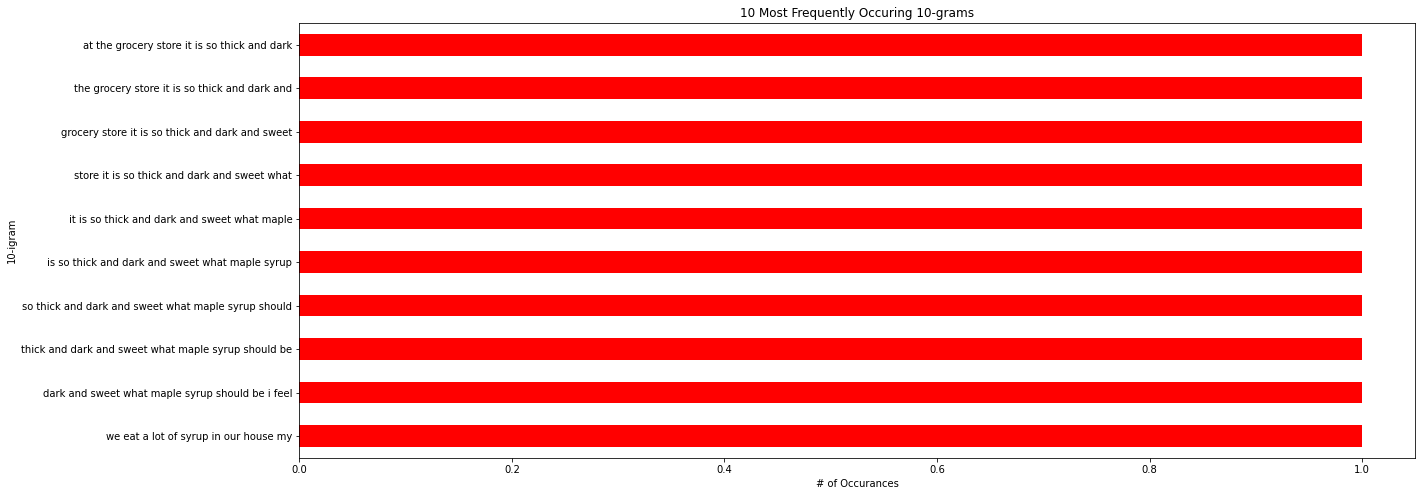

In [ ]:
from google.colab import files

# for i in range(1,11):

i=10
bigram_series = (pd.Series(get_ngrams(i)).value_counts())[:10]
bigram_series.plot.barh(color='red', figsize=(20, 8))
plt.title(f'10 Most Frequently Occuring {i}-grams')
plt.ylabel(f'{i}-igram')
plt.xlabel('# of Occurances')
# files.download(f"unigram.jpg")

**One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

part1 = train_unique.head(50000)
df_new = pd.get_dummies(part1, columns=["clean_reviews"])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 54179
Columns: 49998 entries, Score to clean_reviews_zukes are great training treats because they are small and quickly consumed so you can continue what you are working on   i have shopped everywhere for them and amazon is the best price i have found so we order them frequently  best price on zukes
dtypes: int64(1), object(5), uint8(49992)
memory usage: 2.3+ GB


TF (Term Frequency) 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
test.head()

,Review_text
0,This is a good tasting K-cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...
3,I just bought this and have used it around the...
4,great product. actually we've used it all now...


In [ ]:
X_train = train_unique['clean_reviews']
X_train.head()

0    i received this product early from the seller ...
1    numi s collection assortment melange includes ...
2    i was very careful not to overcook this pasta ...
3    buying this multi pack i was misled by the pic...
4    these bars are so good  i loved them warmed up...
Name: clean_reviews, dtype: object

In [ ]:
X_train

0         i received this product early from the seller ...
1         numi s collection assortment melange includes ...
2         i was very careful not to overcook this pasta ...
3         buying this multi pack i was misled by the pic...
4         these bars are so good  i loved them warmed up...
                                ...                        
426331    this coconut water tastes great  the first tim...
426333    being one that loves a dirty ketel one or grey...
426335    i had been buying at a store  but they had a h...
426337    i love real scottish haggis and this brand  th...
426338    we eat a lot of syrup in our house   my three ...
Name: clean_reviews, Length: 308934, dtype: object

In [ ]:
X_test=test
X_test.head()

,Review_text
0,This is a good tasting K-cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...
3,I just bought this and have used it around the...
4,great product. actually we've used it all now...


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_tfidf = vectorizer.transform(X_train)

In [ ]:
X_train_tfidf

<308934x100540 sparse matrix of type '<class 'numpy.float64'>'
	with 17025589 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_tfidf.shape)

(308934, 100540)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# compute the cosine similarity matrix
cosine_sim = cosine_similarity(X_train_tfidf, X_train_tfidf)

In [ ]:
from sklearn.manifold import MDS
# compute the MDS coordinates
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

Jaccard coefficient  for tf-idf 
representation ??


In [ ]:
#Visualize TF-IDF

pos = mds.fit_transform(cosine_sim)
	
xs, ys = pos[:, 0], pos[:, 1]

# create dataframe
vistfidf_df = pd.DataFrame(dict(x=xs, y=ys, label=df['label']))

# group by label
groups = vistfidf_df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(15, 15))
ax.margins(0.05)

# plot each group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=name)
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')
    ax.legend(numpoints=1)

plt.show()

## Representation
Binary representation , frequency count , Tf-idf ?
• Applications like clustering & topic modelling have reported to work 
better with raw term frequencies
• Stemming or Lemmatization? Stemming useful when mining very small 
documents like discussion board posts or tweets.
Studies have shown that techniques like stemming can sometimes 
degrade classification accuracy when working with larger documents. 
[Charu C. Aggarwal. “Machine Learning for Text.”]



# Models

Naive Bayes (simple, common) –  TODAY 
• k-Nearest Neighbors (simple, powerful)
• Support-vector machines (generally more powerful)
• Logistic Regression ... plus many other methods

In [ ]:
# Function that returns a pipeline given a vectorizer, classifier and [dim_reducer] 

def makePipeline(vectorizer, classifier, dim_reducer = None):
    steps = [('vectorize', vectorizer)]
    
    if dim_reducer:
        steps.append(('dim_reduce', dim_reducer))
    
    steps.append(('classify', classifier))

    return Pipeline(steps)

Add the KNN model

In [ ]:
fields = ['Review Type', 'N-Grams', 'Vectorizer', 'Model', 'Precision', 'Recall', 'Accuracy', 'F1']
table = defaultdict(list)

# Using Stratification to make sure that proportions of classes remain the same in the training and test splits 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)

for representation in ('binary', 'tf', 'tfidf', 'Lem-Stem'):
    for n_grams in (1,2,3):
        for vectorizer in (CountVectorizer(ngram_range=(n_grams,n_grams), lowercase= False), \
            TfidfVectorizer(ngram_range=(n_grams,n_grams), lowercase= False),\
                CountVectorizer(binary=True, ngram_range=(n_grams,n_grams), lowercase= False)):
                for model in (MultinomialNB(), SGDClassifier(), LogisticRegression()):
                    scores = defaultdict(list)
                    for train_idx, test_idx in cv.split(df, df['Self Polarity']):
                        
                        X_train, X_test = df[preProcessType][train_idx], df[preProcessType][test_idx]
                        y_train, y_test = df['Self Polarity'][train_idx], df['Self Polarity'][test_idx] 
                        
                        pipeline = makePipeline(vectorizer=vectorizer, classifier=model)
                        
                        pipeline.fit(X_train, y_train)
                        y_pred = pipeline.predict(X_test)

                        scores['Precision'].append(precision_score(y_test, y_pred, average=None))
                        scores['Recall'].append(recall_score(y_test, y_pred, average=None))
                        scores['F1'].append(f1_score(y_test, y_pred, average=None))
                        scores['Accuracy'].append(accuracy_score(y_test, y_pred))
                    
                    if n_grams == 1:
                        n_grams_str = 'Unigram'
                    elif n_grams == 2:
                        n_grams_str = 'Bigram'
                    else:
                        n_grams_str = 'Trigram'
                    
                    for field, value in (("Tweet Type", preProcessType), ("N-Grams", n_grams_str), \
                        ("Vectorizer", str(vectorizer)), ("Model", str(model))): 

                        table[field].append(value)

                    for field in fields[4:]:
                        table[field].append(mean(scores[field]))

# Sequence Models

So far you have investigated the document as a ‘bag of word model’. Bag of word models fail 
to take advantage of the semantic meaning present in word ordering. Experiment with a least 
one model that looks at the text as a sequence (RNN, LSTM,...). Document your results and 
compare to the bag of word representation models in steps 2-4.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np



In [ ]:
# loading the data
# train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews
0,5,I received this product early from the seller!...,i received this product early from the seller ...
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...


In [ ]:
test_df['clean_reviews'] = test_df['Review_text'].apply(data_cleanup)
test_df.head()

,Review_text,clean_reviews
0,This is a good tasting K-cup from a guy who dr...,this is a good tasting k cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...,love this product and has anyone mentioned th...
3,I just bought this and have used it around the...,i just bought this and have used it around the...
4,great product. actually we've used it all now...,great product actually we have used it all n...


In [ ]:
# apply tokenisation and stop word removal and lemma
train_unique['sequence'] = train_unique['nltk_tokens'].apply(lambda x: " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_unique['sequence'].head()

0    received product early seller tastey great mid...
1    numi collection assortment melange includes he...
2    careful overcook pasta making sure take bite e...
3    buying multi pack misled picture whole hazel n...
4    bar good loved warmed definitely think great s...
Name: sequence, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(train_unique['sequence'])

word_index = tokenizer.word_index
train_unique['tokens'] = tokenizer.texts_to_sequences(train_unique['sequence'])

vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 92638


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,tokens,nltk_tokens,sequence
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[222, 5, 1318, 564, 3939, 4, 1781, 39, 68, 168...","[received, product, early, seller, tastey, gre...",received product early seller tastey great mid...
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[2020, 2275, 1527, 1967, 1105, 10, 452, 50, 24...","[numi, collection, assortment, melange, includ...",numi collection assortment melange includes he...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[953, 5549, 251, 241, 124, 112, 395, 100, 239,...","[careful, overcook, pasta, making, sure, take,...",careful overcook pasta making sure take bite e...
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[147, 2154, 81, 717, 123, 229, 164, 3355, 901,...","[buying, multi, pack, misled, picture, whole, ...",buying multi pack misled picture whole hazel n...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[75, 2, 209, 3281, 143, 59, 4, 68, 269, 222, 5...","[bar, good, loved, warmed, definitely, think, ...",bar good loved warmed definitely think great s...


In [ ]:
max_len = 1500
padded_seq = sequence.pad_sequences(train_unique['tokens'], maxlen = max_len, padding='post')

In [ ]:
padded_seq.shape

(308934, 1500)

In [ ]:
train_df, test_df = train_test_split(train_unique, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (247147, 6)
Test data size :  (61787, 6)


In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(6000+1, embedding_vecor_length, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1500, 32)          192032    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 245,333
Trainable params: 245,333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train.to_list())

y_train = encoder.transform(y_train.to_list())
# y_test = encoder.transform(train_unique.Score.to_list())

y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

y_train shape: (247147, 1)


In [ ]:
model.fit(x_train,y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
1449/2704 [===============>..............] - ETA: 30:27 - loss: -187.2098 - accuracy: 0.0523

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(padded_seq, train_unique['Score'], test_size = 0.2, random_state=42)

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=640)

Epoch 1/5
194/387 [==============>...............] - ETA: 17:09 - loss: -60.6654 - accuracy: 0.0921

KeyboardInterrupt: ignored

# Extra

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_unique['clean_reviews'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 100567


In [ ]:
VOCAB_SIZE = 100000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_unique['clean_reviews'])

In [ ]:
vocab = np.array(encoder.get_vocabulary())
len(vocab)

100000

In [ ]:
encoded_example = encoder(train_unique['clean_reviews'][0])[:3].numpy()
encoded_example

array([  3, 313,  10])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,), dtype=tf.string),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          6400000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,474,369
Trainable params: 6,474,369
No

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[0.00954798]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_unique['clean_reviews'], train_unique['Score'], test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_unique.Score.to_list())

y_train = encoder.transform(train_unique.Score.to_list())
# y_test = encoder.transform(train_unique.Score.to_list())

y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

y_train shape: (308934, 1)


In [ ]:
print(train_unique.head())
print(y_train[:5])

   Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1  numi s collection assortment melange includes ...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                         nltk_tokens  
0  [i, received, this, product, early, from, the,...  
1  [numi, s, collection, assortment, melange, inc...  
2  [i, was, very, careful, not, to, overcook, thi...  
3  [buying, this, multi, pack, i, was, misled, by...  
4  [these

In [ ]:
history = model.fit(train_unique['clean_reviews'], y_train, epochs=10,
                    validation_split=0.2,
                    validation_steps=30)

Epoch 1/10
7724/7724 [==============================] - 2984s 386ms/step - loss: -111461.1562 - accuracy: 0.0530 - val_loss: -196635.9688 - val_accuracy: 0.0916
Epoch 2/10
1786/7724 [=====>........................] - ETA: 34:56 - loss: -140565.2656 - accuracy: 0.0543

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = model.evaluate(x_val, y_val)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'i', 'and', 'a', 'it', 'to', 'of', 'is',
       'this', 'not', 'for', 'in', 'my', 'that', 'have', 'but', 'you',
       'with'], dtype='<U105')

In [ ]:
max_len = 1
for text in train_df['Review_text']:
  if len(text.split(" ")) > max_len:
    max_len = len(text.split(" "))
print("Maximum length of the review is", max_len, "words")

Maximum length of the review is 3545 words


In [ ]:
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = max_len
x_train = pad_sequences(tokenizer.texts_to_sequences(train_df['Review_text']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_df['Review_text']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (426340, 3545)
Testing X Shape: (142114, 3545)
